In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [2]:
df= pd.read_csv("titanic survival.csv")
df.head(10)

#df = sns.load_dataset('titanic survival')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.shape


(891, 12)

In [6]:
df.size
#size in bytes

10692

In [7]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#to understand the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

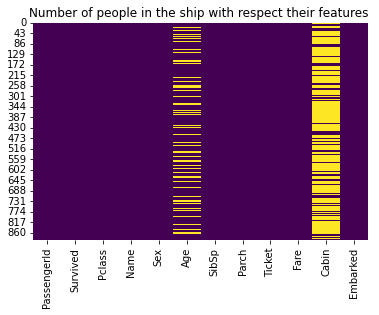

In [13]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people in the ship with respect their features ')
plt.show()

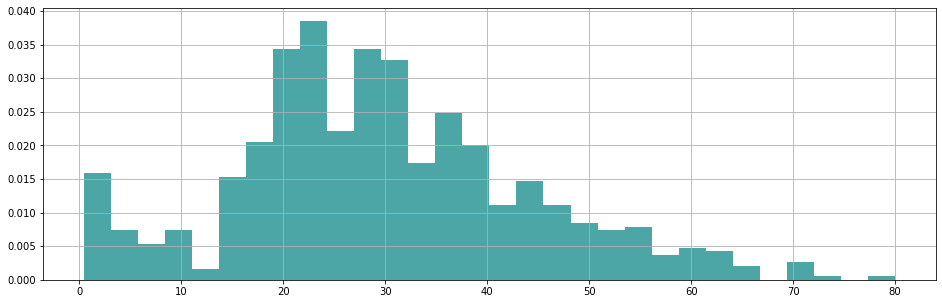

In [14]:
#histogram

ax = df['Age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))


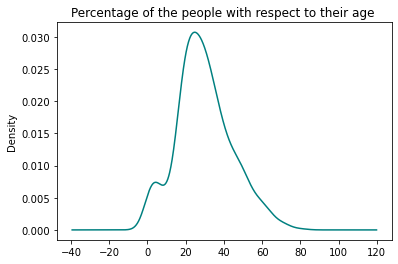

In [15]:
df['Age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.title('Percentage of the people with respect to their age ')
plt.show()

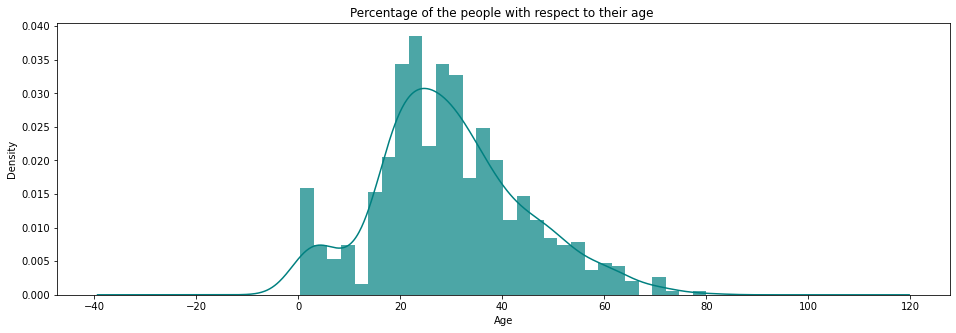

In [16]:
ax = df['Age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
df['Age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.title('Percentage of the people with respect to their age ')
plt.show()

/tmp/ipykernel_7891/3860330730.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women[s]==1].Age.dropna(), bins = 18, label = s, ax = axes[0], kde = False)
/tmp/ipykernel_7891/3860330730.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women[s]==0].Age.dropna(), bins

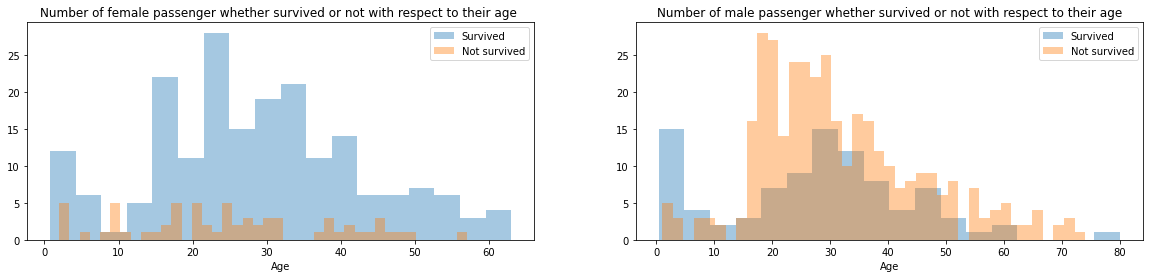

In [17]:
s= 'Survived'
n_s = 'Not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']
                         

ax = sns.distplot(women[women[s]==1].Age.dropna(), bins = 18, label = s, ax = axes[0], kde = False)
ax = sns.distplot(women[women[s]==0].Age.dropna(), bins = 40, label = n_s, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Number of female passenger whether survived or not with respect to their age ')
ax = sns.distplot(men[men[s]==1].Age.dropna(), bins = 18, label = s, ax = axes[1], kde = False)
ax = sns.distplot(men[men[s]==0].Age.dropna(), bins = 40, label = n_s, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Number of male passenger whether survived or not with respect to their age')
#plt.ylabel('No. of people')
plt.show()

In [18]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

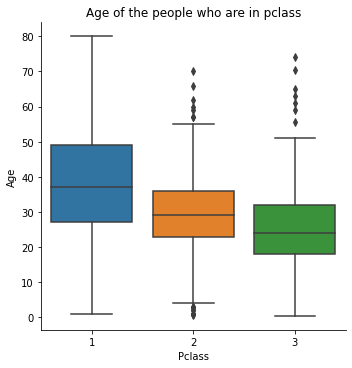

In [19]:
#the people with respect to their age who are in pclass
sns.catplot(x = 'Pclass', y = 'Age', data = df, kind = 'box')
plt.title('Age of the people who are in pclass')
plt.show()

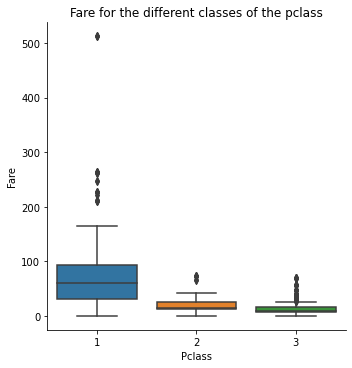

In [20]:
sns.catplot(x = 'Pclass', y = 'Fare', data = df, kind = 'box')
plt.title('Fare for the different classes of the pclass')
plt.show()

In [21]:
df[df['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [22]:
df[df['Pclass'] == 2]['Age'].mean()


29.87763005780347

In [23]:
df[df['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [24]:
#dealing with missing values
#method-imputation
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return df[df['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return df[df['Pclass'] == 2]['Age'].mean()
        elif Pclass == 3:
            return df[df['Pclass'] == 3]['Age'].mean()
        
    else:
        return Age

In [25]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

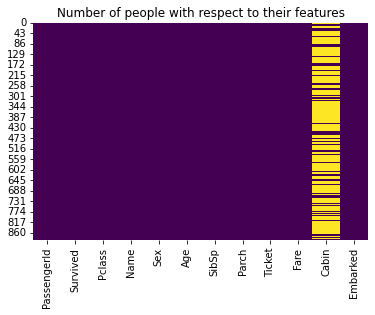

In [26]:
#the changes in the plot
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

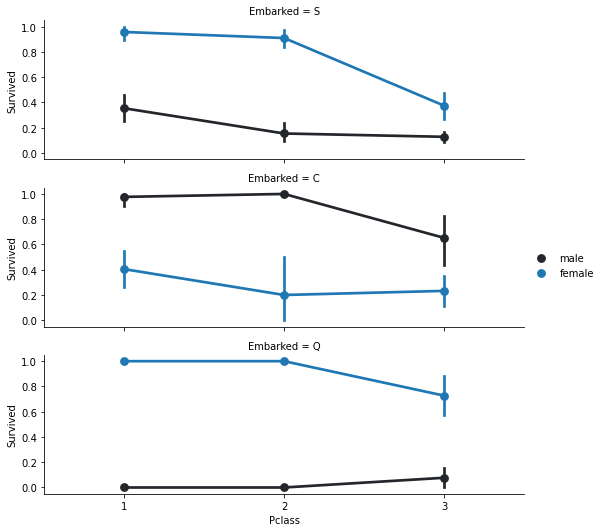

In [27]:
#to fill in embarked column
#analyzing no of passengers get into the ship.
#method - facegrid: Multi-plot grid for plotting conditional relationships.

f = sns.FacetGrid(df, row = 'Embarked', height = 2.5, aspect= 3)
f.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = None, hue_order = None)
f.add_legend()
plt.show()

In [28]:
df['Embarked'].isnull().sum()

2

In [29]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
most_common = 'S'
df['Embarked'].fillna(most_common, inplace = True) 

In [31]:
df['Embarked'].isnull().sum()

0

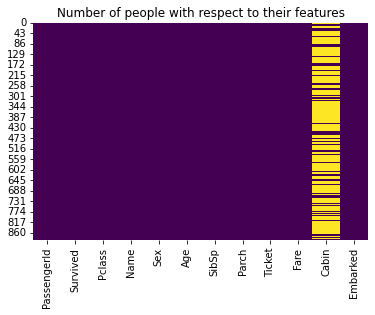

In [32]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

In [33]:
#to get a heatmap w/o cabin
df.drop(labels=['Cabin'], inplace = True, axis = 1)

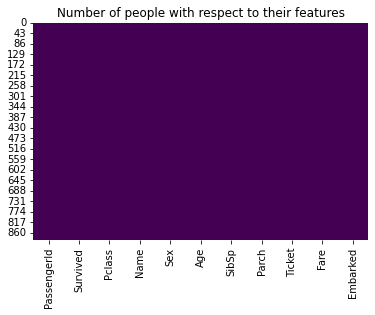

In [34]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people with respect to their features')
plt.show()

In [35]:
#new data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
#feature transformation-converting diff data types to int
df['Fare'] = df['Fare'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Pclass'] = df['Pclass'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    object
dtypes: int64(7), object(4)
memory usage: 76.7+ KB


In [38]:
#categorical data into numerical data

gender = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender)

ports = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(ports)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,0


In [39]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       891
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Embarked'>

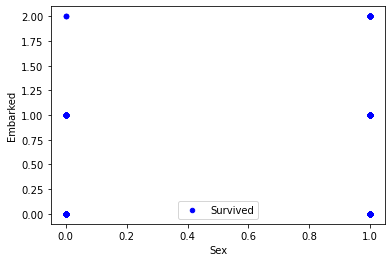

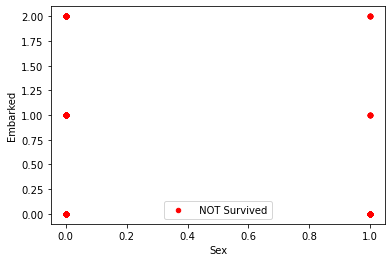

In [46]:
#distribution of classes

survived_df= df[df['Survived']==1][0:1000]
not_survived_df= df[df['Survived']==0][0:1000]

axes=survived_df.plot(kind='scatter',x='Sex',y='Embarked',color='blue',label='Survived')
not_survived_df.plot(kind='scatter',x='Sex',y='Embarked',color='red',label=' NOT Survived')
#help(survived_df.plot)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 76.7+ KB


In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [52]:
feature_df=df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

#independent variables
X= np.asarray(feature_df)

#dependent variables
y=np.asarray(df['Survived'])

In [53]:
X[0:5]

array([[ 1,  0,  3,  0, 22,  1,  0,  7,  0],
       [ 2,  1,  1,  1, 38,  1,  0, 71,  1],
       [ 3,  1,  3,  1, 26,  0,  0,  7,  0],
       [ 4,  1,  1,  1, 35,  1,  0, 53,  0],
       [ 5,  0,  3,  0, 35,  0,  0,  8,  0]])

In [54]:
y[0:5]

array([0, 1, 1, 1, 0])

In [57]:
#2nd method -  to drop columns
#df.drop(labels = ['Name','Ticket'], axis = 1, inplace= True)
#df.head()

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

In [61]:
X_train.shape

(712, 9)

In [62]:
y_train.shape

(712,)

In [63]:
X_test.shape

(179, 9)

In [64]:
y_test.shape

(179,)

In [69]:
from sklearn import svm
#support vector classifier - points near to the hyperplane and then sum it up and compare with the diff subsets
#gamma-kernel coefficients
#c-penalty imposed on incorrect placed datapoint

classifier = svm.SVC(kernel = 'linear', gamma='auto', C=2)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)


In [76]:
#Evaluation

from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,y_predict))

#precision = true +ve prediction / total +ve predicts= true +ve/(true +ve + false +ve )
#recall =true +ve/(true +ve + false -ve )
#f1 =2*(precision * recall)/(precision + recall)
#support - how many cases are there of 0 or 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        60

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [77]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  1.0


Confusion Matrix


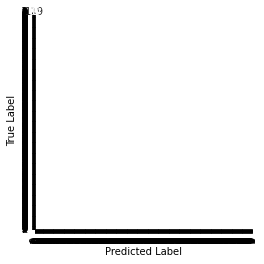

In [79]:
print('Confusion Matrix')

mat = metrics.confusion_matrix(y_test, y_predict)

sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels=df.Survived,
           yticklabels=df.Embarked)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [80]:
#Polynomial Kernel


classifier = svm.SVC(kernel = 'poly', gamma='auto', C=2)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [81]:
#Evaluation

from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       119
           1       0.95      0.98      0.97        60

    accuracy                           0.98       179
   macro avg       0.97      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179



In [82]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9776536312849162


In [84]:
#Sigmoid Kernel


classifier = svm.SVC(kernel = 'sigmoid', gamma='auto', C=2)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [85]:
#Evaluation

from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       119
           1       0.00      0.00      0.00        60

    accuracy                           0.66       179
   macro avg       0.33      0.50      0.40       179
weighted avg       0.44      0.66      0.53       179



/home/tanisha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tanisha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tanisha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.664804469273743
